# Regresión logística

Por:**Naren Castellon**

En este modulo nos vamos a enfocar en la construcción de un modelo de regresión logística con PySpark junto con la comprensión de las ideas detrás de la regresión logística. La regresión logística se utiliza para problemas de clasificación. Aunque se usa para la clasificación, todavía se llama regresión logística. Esto se debe al hecho de que, las ecuaciones de regresión lineal siguen funcionando para encontrar la relación entre las variables de entrada y las variables de destino. La principal distinción entre la regresión lineal y la logística es que usamos algún tipo de función no lineal para convertir la salida de esta última en la probabilidad de restringirla entre 0 y 1. Por ejemplo, podemos usar la regresión logística para predecir si un usuario compraría el producto o no. En este caso, el modelo devolvería una probabilidad de compra para cada usuario. La regresión logística se usa ampliamente en muchas aplicaciones comerciales.

## Probabilidad
Para entender la regresión logística, primero tendremos que repasar el concepto de probabilidad. Se define **la probabilidad como las posibilidades de ocurrencia de un evento deseado o resultados interesados sobre todos los resultados posibles**. Tomemos, por ejemplo, si lanzamos una moneda, las posibilidades de obtener cara o cruz son iguales (50 %).

Si lanzamos un dado justo, entonces la probabilidad de obtener cualquiera de los números entre (1 a 6) es igual al 16,7%.

Si sacamos una bola de una bolsa que contiene cuatro bolas verdes y una azul, la probabilidad de sacar una bola verde es del 80%.

La regresión logística se utiliza para predecir la probabilidad de cada clase objetivo. En caso de clasificación binaria (solo dos clases), devuelve la probabilidad asociada a cada clase para cada registro. Como se mencionó, utiliza la regresión lineal detrás de escena para capturar la relación entre las variables de entrada y salida, pero además usamos un elemento más (función no lineal) para convertir la salida de forma continua en probabilidad. Entendamos esto con la ayuda de un ejemplo. Consideremos que tenemos que usar modelos para predecir si algún usuario en particular compraría el producto o no, y estamos usando solo una variable de entrada que es el tiempo que el usuario pasa en el sitio web. 

## Uso de Logit
Para lograr el objetivo de convertir el valor de salida en probabilidad, usamos algo llamado Logit. Logit es una función no lineal y realiza una transformación no lineal de una ecuación lineal para convertir la salida entre 0 y 1. En la regresión logística, esa función no lineal es la función sigmoidea, que se ve así:

$$\frac{1}{1+ e^{-x}}$$

y siempre produce valores entre 0 y 1 independientes de los valores de $x$.

Entonces, volviendo a nuestra ecuación de regresión lineal 
$$y = B_0 + B_1 x$$

pasamos nuestra salida (y) a través de esta función no lineal (sigmoide) para cambiar sus valores entre 0 y 1.

$$Probabilidad =\frac{1}{1+ e^{-y}}$$

$$Probabilidad =\frac{1}{1+ e^{-( B_0 + B_1 x)}}$$

Usando la ecuación anterior, los valores pronosticados se limitan entre 0 y 1 y la salida ahora se ve como se muestra en la Figura 5-6.

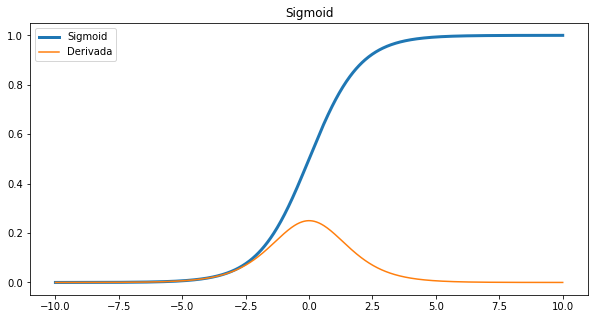

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return 1/(1+np.exp(-x)) * (1-1/(1+np.exp(-x)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    return 1/(1+np.exp(-x)) * (1-1/(1+np.exp(-x)))

x = np.linspace(-10, 10, 1000)
y = np.minimum(np.maximum(0, x),6)

plt.figure(figsize=(10,5))
plt.plot(x, list(map(lambda x: sigmoid(x),x)), label="Sigmoid", lw=3)
plt.plot(x, list(map(lambda x: der_sigmoid(x),x)), label="Derivada")
plt.title("Sigmoid")
plt.legend()
plt.show();

La ventaja de usar la función no lineal es que, independientemente de cualquier valor de entrada (tiempo empleado), la salida siempre sería la probabilidad de conversión. Esta curva también se conoce como curva logística. La regresión logística también asume que existe una relación lineal entre la entrada y las variables objetivo y, por lo tanto, se encuentran los valores más óptimos de la intersección y los coeficientes para capturar esta relación.

## Interpretación (Coeficientes)
Los coeficientes de las variables de entrada se obtienen mediante una técnica conocida como gradiente descendente, que busca optimizar la función de pérdida de tal forma que se minimice el error total. Podemos mirar la ecuación de regresión logística y comprender la interpretación de los coeficientes.

$$y =\frac{1}{1+ e^{-( B_0 + B_1 x)}}$$



## Dummy Variables
Hasta ahora, solo hemos tratado con variables continuas/numéricas, pero la presencia de variables categóricas en el conjunto de datos es inevitable. Entonces, comprendamos el enfoque para usar los valores categóricos con fines de modelado. Dado que los modelos de aprendizaje automático solo consumen datos en formato numérico, debemos adoptar alguna técnica para convertir los datos categóricos en formato numérico. Ya hemos visto un ejemplo anterior donde convertimos nuestra clase objetivo (Sí/No) en valores numéricos (1 o 0). Esto se conoce como codificación de etiquetas, donde asignamos valores numéricos únicos a cada una de las categorías presentes en esa columna en particular. Hay otro enfoque que funciona muy bien y se conoce como dummificación o codificación en caliente. Entendamos esto con la ayuda de un ejemplo. Agreguemos una columna más a nuestros datos de ejemplo existentes. Supongamos que tenemos una columna adicional que contiene el motor de búsqueda que utilizó el usuario. Entonces, nuestros datos se parecen a esto, como se muestra en la Tabla 5-3.

|Sr. No| Time Spent (mins) |Search Engine |Converted|
|------|-------------------|--------------|---------|
|1 |5| Google| 0|
|2 |2 |Bing |0|
|3| 10| Yahoo |1|
|4| 15| Bing| 1|
|5 |1| Yahoo| 0|
|6| 12 |Google |1|

Por lo tanto, para consumir la información adicional provista en la columna Motor de búsqueda, tenemos que convertirla a un formato numérico mediante dummificación. Como resultado, obtendríamos una cantidad adicional de variables ficticias (columnas), que sería igual a la cantidad de categorías distintas en la columna Motor de búsqueda. Los pasos a continuación explican todo el proceso de convertir una característica categórica en una numérica.
1. Averigüe el número distinto de categorías en la columna categórica. Tenemos solo tres categorías distintas a partir de ahora (Google, Bing, Yahoo).
2. Cree nuevas columnas para cada una de las distintas categorías y agregue el valor 1 en la columna de categoría para la que está presente o bien 0 como se muestra en la Tabla 5-4.

|One hot encoding|
|----------------|

|Sr. No| Time Spent(mins)|Search Engine|SE_Google |SE_Bing| SE_Yahoo| Converted|
|------|-----------------|-------------|----------|-------|---------|----------|
|1| 1 |Google| 1| 0| 0| 0|
|2| 2| Bing| 0| 1| 0 |0|
|3| 5| Yahoo| 0| 0 |1 |0
|4 |15| Bing |0| 1| 0 |1
|5 |17| Yahoo| 0 |0 |1 |1
|6 |18| Google| 1| 0 |0 |1

3. Elimina la columna de categorías original. Asi que,
el conjunto de datos ahora contiene cinco columnas en total (excluyendo el índice) porque tenemos tres variables ficticias adicionales, como se muestra en la Tabla 5-5.

|Sr. No| Time Spent (mins)|SE_Google |SE_Bing| SE_Yahoo| Converted|
|------|-------------|----------|-------|---------|----------|
|1| 1 | 1| 0| 0| 0|
|2| 2| 0| 1| 0 |0|
|3| 5|  0| 0 |1 |0
|4 |15| 0| 1| 0 |1
|5 |17|  0 |1 |0 |1
|6 |18|  1| 0 |0 |1

La idea general es representar la misma información de una manera diferente para que el modelo de aprendizaje automático también pueda aprender de los valores categóricos.

## Evaluación del modelo
Para medir el rendimiento del modelo de regresión logística, podemos utilizar varias métricas. El más obvio es el parámetro de precisión. La precisión es el porcentaje de predicciones correctas realizadas por el modelo. Sin embargo, la precisión no siempre es el enfoque preferido. Para comprender el desempeño del modelo logístico, debemos usar una matriz de confusión. Consiste en el recuento de valores para las predicciones frente a los valores reales. Una matriz de confusión para la clase binaria se parece a la tabla como se muestra.

|Confusion Matrix|
------------------

|Actual/Prediction |Predicted Class (Yes) |Predicted Class (No)|
|------------------|----------------------|--------------------|
|Actual Class (Yes) |True Positives (TP) |False Negatives (FN)|
|Actual Class (No) |False Positives (FP) |True Negatives (TN)|

Entendamos los valores individuales en la matriz de confusión.

### Verdaderos positivos
Estos son los valores que son de una clase positiva en realidad, y el modelo también los predijo correctamente como de clase positiva.
* Clase real: Positivo (1)
* Clase de predicción del modelo ML: Positivo (1)

### Verdaderos negativos
Estos son los valores que en realidad son de una clase negativa, y el modelo también predijo correctamente que serían de la clase negativa.
* Clase real: Negativo (0)
* Clase de predicción del modelo ML: Negativo (1)

### Falsos positivos
Estos son los valores que en realidad son de clase negativa, pero el modelo predijo incorrectamente que eran de clase positiva.
* Clase real: Negativo (0)
* Clase de predicción del modelo ML: Positivo (1)

### Falsos negativos
Estos son los valores que en realidad son de clase positiva, pero el modelo predijo incorrectamente que eran de clase negativa.
* Clase real: Positivo (1)
* Clase de predicción del modelo ML: Negativo (1)

### Accuracy
Accuracy es la suma de verdaderos positivos y verdaderos negativos dividida por el número total de registros:
$$\frac{TP +TN}{total \ de \ registros}$$

Pero como se dijo anteriormente, no siempre es la métrica preferida debido al desequilibrio de la clase objetivo. La mayoría de las veces, la frecuencia de la clase objetivo está sesgada (mayor número de ejemplos TN en comparación con los ejemplos TP). Tomemos, por ejemplo, el conjunto de datos para la detección de fraude que contiene el 99 % de las transacciones genuinas y solo el 1 % de las fraudulentas. Ahora, si nuestro modelo de regresión logística predice todas las transacciones genuinas y ningún caso de fraude, aún así obtiene una precisión del 99 %. El objetivo es averiguar el rendimiento con respecto a la clase positiva; por lo tanto, hay un par de otras métricas de evaluación que podemos usar.

### Recall
La tasa de recuperación ayuda a evaluar el rendimiento del modelo desde un punto de vista de clase positivo. Indica el porcentaje de casos positivos reales que el modelo puede predecir correctamente del número total de casos positivos.

$$\frac{TP}{TP+FN}$$

Habla de la calidad del modelo de aprendizaje automático cuando se trata de predecir una clase positiva. Entonces, del total de clases positivas, **¿cuántas pudo predecir correctamente el modelo?** Esta métrica es ampliamente utilizada como criterio de evaluación para modelos de clasificación.

### Precision
Precision se trata del número de casos positivos reales de todos los casos positivos predichos por el modelo:

$$\frac{TP}{TP+FP}$$

Estos también se pueden utilizar como criterios de evaluación.

### F1 Score

$$F1 Score = 2\times \frac{Precision \times Recall}{Precision + Recall}$$

### Cut Off /Threshold Probability
Dado que sabemos que el resultado del modelo de regresión logística es la puntuación de probabilidad, es muy importante decidir el límite de corte o umbral de la probabilidad de predicción. De forma predeterminada, el umbral de probabilidad se establece en 50%. Significa que si la salida de probabilidad del modelo es inferior al 50%, el modelo predecirá que será de clase negativa (0), y si es igual y superior al 50%, se le asignará una clase positiva (1) .

Si el límite del umbral es muy bajo, el modelo predecirá muchas clases positivas y tendrá una alta tasa de recuperación. Por el contrario, si el umbral de probabilidad es muy alto, el modelo podría perder casos positivos y la tasa de recuperación sería baja, pero la precisión sería mayor. En este caso, el modelo predecirá muy pocos casos positivos. Decidir un buen valor de umbral suele ser un desafío. Una curva característica del operador del receptor, o curva ROC, puede ayudar a decidir qué valor del umbral es el mejor.

### Curva ROC
El ROC se utiliza para decidir el valor de umbral para el modelo. Es el gráfico entre recall (también conocido como sensibilidad) y precision (especificidad).

A uno le gustaría elegir un umbral que ofrezca un equilibrio entre la recuperación y la precisión. Entonces, ahora que comprendemos varios componentes asociados con la regresión logística, podemos continuar y construir un modelo de regresión logística usando PySpark.

## Información de datos
El conjunto de datos que vamos a usar para este ejemplo es un conjunto de datos ficticio y contiene un total de 20 000 filas y 6 columnas. Tenemos que usar 5 variables de entrada para predecir la clase objetivo usando el modelo de regresión logística. Este conjunto de datos contiene información sobre los usuarios en línea de un sitio web minorista de artículos deportivos. Los datos capturan el país del usuario, la plataforma utilizada, la edad, el visitante repetido o el visitante por primera vez y la cantidad de páginas web visitadas en el sitio web. También tiene la información de si el cliente finalmente compró el producto o no (estado de conversión).

# Modelando con Pyspark

## 1. Crear el objeto de sesión de Spark
Iniciamos Jupyter Notebook e importamos SparkSession y creamos un nuevo objeto SparkSession para usar Spark.

In [0]:
# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

In [0]:
#import SparkSession
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Regresion_logistica').getOrCreate()

## 2. Leer el conjunto de datos
Luego cargamos y leemos el conjunto de datos dentro de Spark usando Dataframe. Debemos asegurarnos de haber abierto PySpark desde la misma carpeta de directorio donde está disponible el conjunto de datos o debemos mencionar la ruta del directorio de la carpeta de datos.

In [0]:
# Cargamos los datos


filename = "/FileStore/tables/Log_Reg_dataset.csv"

df = spark.read.csv(filename, header=True, inferSchema=True, sep=',')
display(df)

Country,Age,Repeat_Visitor,Platform,Web_pages_viewed,Status
India,41,1,Yahoo,21,1
Brazil,28,1,Yahoo,5,0
Brazil,40,0,Google,3,0
Indonesia,31,1,Bing,15,1
Malaysia,32,0,Google,15,1
Brazil,32,0,Google,3,0
Brazil,32,0,Google,6,0
Indonesia,27,0,Google,9,0
Indonesia,32,0,Yahoo,2,0
Indonesia,31,1,Bing,16,1


In [0]:
df.show()

+---------+---+--------------+--------+----------------+------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+---------+---+--------------+--------+----------------+------+
|    India| 41|             1|   Yahoo|              21|     1|
|   Brazil| 28|             1|   Yahoo|               5|     0|
|   Brazil| 40|             0|  Google|               3|     0|
|Indonesia| 31|             1|    Bing|              15|     1|
| Malaysia| 32|             0|  Google|              15|     1|
|   Brazil| 32|             0|  Google|               3|     0|
|   Brazil| 32|             0|  Google|               6|     0|
|Indonesia| 27|             0|  Google|               9|     0|
|Indonesia| 32|             0|   Yahoo|               2|     0|
|Indonesia| 31|             1|    Bing|              16|     1|
| Malaysia| 27|             1|  Google|              21|     1|
|Indonesia| 29|             1|   Yahoo|               9|     1|
|Indonesia| 33|             1|   Yahoo| 

## 3: Análisis exploratorio de datos
En esta sección, profundizamos en el conjunto de datos mediante la visualización del conjunto de datos y la validación de su forma y varias medidas estadísticas de las variables. Comenzamos comprobando la forma del conjunto de datos:

In [0]:
from pyspark.sql.functions import *


In [0]:
#check the shape of the data 
print((df.count(),len(df.columns)))

(20000, 6)


Entonces, la salida anterior confirma el tamaño de nuestro conjunto de datos y luego podemos validar los tipos de datos de los valores de entrada para verificar si necesitamos cambiar/convertir los tipos de datos de las columnas.

In [0]:
#printSchema
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)



In [0]:
# nombre de las columnas
df.columns

Out[8]: ['Country', 'Age', 'Repeat_Visitor', 'Platform', 'Web_pages_viewed', 'Status']

Como podemos ver, hay dos columnas de este tipo (País, Motor de búsqueda), que son categóricas por naturaleza y, por lo tanto, deben convertirse a formato numérico. Echemos un vistazo al conjunto de datos usando la función mostrar en Spark.

In [0]:
#view the dataset
df.show(5)

+---------+---+--------------+--------+----------------+------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|
+---------+---+--------------+--------+----------------+------+
|    India| 41|             1|   Yahoo|              21|     1|
|   Brazil| 28|             1|   Yahoo|               5|     0|
|   Brazil| 40|             0|  Google|               3|     0|
|Indonesia| 31|             1|    Bing|              15|     1|
| Malaysia| 32|             0|  Google|              15|     1|
+---------+---+--------------+--------+----------------+------+
only showing top 5 rows



Ahora podemos usar la función de descripción para repasar las medidas estadísticas del conjunto de datos.

In [0]:
#Exploratory Data Analysis
df.describe().show()


+-------+--------+-----------------+-----------------+--------+-----------------+------------------+
|summary| Country|              Age|   Repeat_Visitor|Platform| Web_pages_viewed|            Status|
+-------+--------+-----------------+-----------------+--------+-----------------+------------------+
|  count|   20000|            20000|            20000|   20000|            20000|             20000|
|   mean|    null|         28.53955|           0.5029|    null|           9.5533|               0.5|
| stddev|    null|7.888912950773227|0.500004090187782|    null|6.073903499824976|0.5000125004687693|
|    min|  Brazil|               17|                0|    Bing|                1|                 0|
|    max|Malaysia|              111|                1|   Yahoo|               29|                 1|
+-------+--------+-----------------+-----------------+--------+-----------------+------------------+



Podemos observar que la edad promedio de los visitantes es cercana a los 28 años, y visitan alrededor de 9 páginas web durante la visita al sitio web.

Exploremos columnas individuales para comprender los datos en detalles más profundos. La función groupBy utilizada junto con counts devuelve la frecuencia de cada una de las categorías en los datos.

In [0]:
df.groupBy('Country').count().show()

+---------+-----+
|  Country|count|
+---------+-----+
| Malaysia| 1218|
|    India| 4018|
|Indonesia|12178|
|   Brazil| 2586|
+---------+-----+



Entonces, el número máximo de visitantes son de Indonesia, seguido de India:

In [0]:
df.groupBy('Platform').count().show()

+--------+-----+
|Platform|count|
+--------+-----+
|   Yahoo| 9859|
|    Bing| 4360|
|  Google| 5781|
+--------+-----+



Los usuarios del motor de búsqueda de Yahoo son los más altos en número.

In [0]:
df.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1|10000|
|     0|10000|
+------+-----+



Tenemos un número igual de usuarios convertidos y no convertidos.

Usemos la función groupBy junto con la media para saber más sobre el conjunto de datos.

In [0]:
df.groupBy('Country').mean().show()

+---------+------------------+-------------------+---------------------+--------------------+
|  Country|          avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|         avg(Status)|
+---------+------------------+-------------------+---------------------+--------------------+
| Malaysia|27.792282430213465| 0.5730706075533661|   11.192118226600986|  0.6568144499178982|
|    India|27.976854156296664| 0.5433051269288203|   10.727227476356397|  0.6212045793927327|
|Indonesia| 28.43159796354081| 0.5207751683363442|    9.985711939563148|  0.5422893742814913|
|   Brazil|30.274168600154677|  0.322892498066512|    4.921113689095128|0.038669760247486466|
+---------+------------------+-------------------+---------------------+--------------------+



Tenemos la tasa de conversión más alta de Malasia, seguida de India. El número promedio de visitas a la página web es más alto en Malasia y más bajo en Brasil.

In [0]:
df.groupBy('Platform').mean().show()

+--------+------------------+-------------------+---------------------+------------------+
|Platform|          avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|       avg(Status)|
+--------+------------------+-------------------+---------------------+------------------+
|   Yahoo|28.569226087838523| 0.5094837204584644|    9.599655137437875|0.5071508266558474|
|    Bing| 28.68394495412844| 0.4720183486238532|    9.114908256880733|0.4559633027522936|
|  Google|28.380038055699707| 0.5149628092025601|    9.804878048780488|0.5210171250648676|
+--------+------------------+-------------------+---------------------+------------------+



Tenemos la tasa de conversión más alta de usuarios visitantes que utilizan el motor de búsqueda de Google.

In [0]:
df.groupBy('Status').mean().show()

+------+--------+-------------------+---------------------+-----------+
|Status|avg(Age)|avg(Repeat_Visitor)|avg(Web_pages_viewed)|avg(Status)|
+------+--------+-------------------+---------------------+-----------+
|     1| 26.5435|             0.7019|              14.5617|        1.0|
|     0| 30.5356|             0.3039|               4.5449|        0.0|
+------+--------+-------------------+---------------------+-----------+



Podemos ver claramente que existe una fuerte conexión entre el estado de conversión y la cantidad de páginas vistas junto con las visitas repetidas.

## 4: Feature Engineering
Esta es la parte en la que convertimos la variable categórica en forma numérica y creamos un solo vector que combina todas las características de entrada mediante el VectorAssembler de Spark.

In [0]:
#converting categorical data to numerical form

In [0]:
#import required libraries

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

Dado que estamos tratando con dos columnas categóricas, tendremos que convertir las columnas del motor de búsqueda y del país en forma numérica. El modelo de aprendizaje automático no puede comprender los valores categóricos.

El primer paso es etiquetar la columna usando StringIndexer en forma numérica. Asigna valores únicos a cada una de las categorías de la columna. Entonces, en el siguiente ejemplo, a los tres valores del motor de búsqueda (Yahoo, Google, Bing) se les asignan valores (0.0, 1.0, 2.0). Esto es visible en la columna denominada search_engine_num.

In [0]:
df.display()

Country,Age,Repeat_Visitor,Platform,Web_pages_viewed,Status
India,41,1,Yahoo,21,1
Brazil,28,1,Yahoo,5,0
Brazil,40,0,Google,3,0
Indonesia,31,1,Bing,15,1
Malaysia,32,0,Google,15,1
Brazil,32,0,Google,3,0
Brazil,32,0,Google,6,0
Indonesia,27,0,Google,9,0
Indonesia,32,0,Yahoo,2,0
Indonesia,31,1,Bing,16,1


In [0]:
search_engine_indexer = StringIndexer(inputCol="Platform", outputCol="Search_Engine_Num").fit(df)
df = search_engine_indexer.transform(df)

In [0]:
df.show(3,False)

+-------+---+--------------+--------+----------------+------+-----------------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Search_Engine_Num|
+-------+---+--------------+--------+----------------+------+-----------------+
|India  |41 |1             |Yahoo   |21              |1     |0.0              |
|Brazil |28 |1             |Yahoo   |5               |0     |0.0              |
|Brazil |40 |0             |Google  |3               |0     |1.0              |
+-------+---+--------------+--------+----------------+------+-----------------+
only showing top 3 rows



In [0]:
df.groupBy('Platform').count().orderBy('count',ascending=False).show(5,False)

+--------+-----+
|Platform|count|
+--------+-----+
|Yahoo   |9859 |
|Google  |5781 |
|Bing    |4360 |
+--------+-----+



In [0]:
df.groupBy("Search_Engine_Num").count().orderBy('count',ascending=False).show(5,False)

+-----------------+-----+
|Search_Engine_Num|count|
+-----------------+-----+
|0.0              |9859 |
|1.0              |5781 |
|2.0              |4360 |
+-----------------+-----+



El siguiente paso es representar cada uno de estos valores en forma de un vector codificado en caliente. Sin embargo, este vector es un poco diferente en términos de representación ya que captura los valores y la posición de los valores en el vector.

In [0]:
from pyspark.ml.feature import OneHotEncoder

In [0]:
#one hot encoding
search_engine_encoder = OneHotEncoder(inputCol="Search_Engine_Num", outputCol="Search_Engine_Vector")
df = search_engine_encoder.fit(df).transform(df)


In [0]:
df.show(3,False)

+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
|Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Search_Engine_Num|Search_Engine_Vector|
+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
|India  |41 |1             |Yahoo   |21              |1     |0.0              |(2,[0],[1.0])       |
|Brazil |28 |1             |Yahoo   |5               |0     |0.0              |(2,[0],[1.0])       |
|Brazil |40 |0             |Google  |3               |0     |1.0              |(2,[1],[1.0])       |
+-------+---+--------------+--------+----------------+------+-----------------+--------------------+
only showing top 3 rows



In [0]:
df.groupBy('Platform').count().orderBy('count',ascending=False).show(5,False)

+--------+-----+
|Platform|count|
+--------+-----+
|Yahoo   |9859 |
|Google  |5781 |
|Bing    |4360 |
+--------+-----+



In [0]:
df.groupBy('Search_Engine_Num').count().orderBy('count',ascending=False).show(5,False)

+-----------------+-----+
|Search_Engine_Num|count|
+-----------------+-----+
|0.0              |9859 |
|1.0              |5781 |
|2.0              |4360 |
+-----------------+-----+



In [0]:
df.groupBy('Search_Engine_Vector').count().orderBy('count',ascending=False).show(5,False)

+--------------------+-----+
|Search_Engine_Vector|count|
+--------------------+-----+
|(2,[0],[1.0])       |9859 |
|(2,[1],[1.0])       |5781 |
|(2,[],[])           |4360 |
+--------------------+-----+



La característica final que estaríamos usando para construir la regresión logística es Search_Engine_Vector. Comprendamos qué representan estos valores de columna.

Este tipo de representación permite ahorrar espacio computacional y, por lo tanto, acelerar el tiempo de cálculo. La longitud del vector es igual a uno menos que el número total de elementos ya que cada valor se puede representar fácilmente con solo la ayuda de dos columnas. Por ejemplo, si necesitamos representar el motor de búsqueda usando una codificación en caliente.

Repitamos el mismo procedimiento para la otra columna categórica (Country).

In [0]:
country_indexer = StringIndexer(inputCol="Country", outputCol="Country_Num").fit(df)
df = country_indexer.transform(df)

In [0]:
df.groupBy('Country').count().orderBy('count',ascending=False).show(5,False)

+---------+-----+
|Country  |count|
+---------+-----+
|Indonesia|12178|
|India    |4018 |
|Brazil   |2586 |
|Malaysia |1218 |
+---------+-----+



In [0]:
df.groupBy('Country_Num').count().orderBy('count',ascending=False).show(5,False)

+-----------+-----+
|Country_Num|count|
+-----------+-----+
|0.0        |12178|
|1.0        |4018 |
|2.0        |2586 |
|3.0        |1218 |
+-----------+-----+



In [0]:
#one hot encoding
country_encoder = OneHotEncoder(inputCol="Country_Num", outputCol="Country_Vector")
df = country_encoder.fit(df).transform(df)

In [0]:
df.select(['Country','country_Num','Country_Vector']).show(3,False)

+-------+-----------+--------------+
|Country|country_Num|Country_Vector|
+-------+-----------+--------------+
|India  |1.0        |(3,[1],[1.0]) |
|Brazil |2.0        |(3,[2],[1.0]) |
|Brazil |2.0        |(3,[2],[1.0]) |
+-------+-----------+--------------+
only showing top 3 rows



In [0]:
df.groupBy('Country').count().orderBy('count',ascending=False).show(5,False)

+---------+-----+
|Country  |count|
+---------+-----+
|Indonesia|12178|
|India    |4018 |
|Brazil   |2586 |
|Malaysia |1218 |
+---------+-----+



In [0]:
df.groupBy('Country_Num').count().orderBy('count',ascending=False).show(5,False)

+-----------+-----+
|Country_Num|count|
+-----------+-----+
|0.0        |12178|
|1.0        |4018 |
|2.0        |2586 |
|3.0        |1218 |
+-----------+-----+



In [0]:
df.groupBy('Country_Vector').count().orderBy('count',ascending=False).show(5,False)

+--------------+-----+
|Country_Vector|count|
+--------------+-----+
|(3,[0],[1.0]) |12178|
|(3,[1],[1.0]) |4018 |
|(3,[2],[1.0]) |2586 |
|(3,[],[])     |1218 |
+--------------+-----+



Ahora que hemos convertido ambas columnas categóricas en formas numéricas, necesitamos ensamblar todas las columnas de entrada en un solo vector que actuaría como la característica de entrada para el modelo.

Entonces, seleccionamos las columnas de entrada que necesitamos usar para crear el vector de características único y nombramos el vector de salida como características.

In [0]:
df.show(5)

+---------+---+--------------+--------+----------------+------+-----------------+--------------------+-----------+--------------+
|  Country|Age|Repeat_Visitor|Platform|Web_pages_viewed|Status|Search_Engine_Num|Search_Engine_Vector|Country_Num|Country_Vector|
+---------+---+--------------+--------+----------------+------+-----------------+--------------------+-----------+--------------+
|    India| 41|             1|   Yahoo|              21|     1|              0.0|       (2,[0],[1.0])|        1.0| (3,[1],[1.0])|
|   Brazil| 28|             1|   Yahoo|               5|     0|              0.0|       (2,[0],[1.0])|        2.0| (3,[2],[1.0])|
|   Brazil| 40|             0|  Google|               3|     0|              1.0|       (2,[1],[1.0])|        2.0| (3,[2],[1.0])|
|Indonesia| 31|             1|    Bing|              15|     1|              2.0|           (2,[],[])|        0.0| (3,[0],[1.0])|
| Malaysia| 32|             0|  Google|              15|     1|              1.0|       (2

In [0]:
from pyspark.ml.feature import VectorAssembler

In [0]:
df_assembler = VectorAssembler(inputCols=['Search_Engine_Vector','Country_Vector','Age', 'Repeat_Visitor',
                                          'Web_pages_viewed'], outputCol="features")

df = df_assembler.transform(df)

In [0]:
df.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Repeat_Visitor: integer (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Web_pages_viewed: integer (nullable = true)
 |-- Status: integer (nullable = true)
 |-- Search_Engine_Num: double (nullable = false)
 |-- Search_Engine_Vector: vector (nullable = true)
 |-- Country_Num: double (nullable = false)
 |-- Country_Vector: vector (nullable = true)
 |-- features: vector (nullable = true)



Como podemos ver, ahora tenemos una columna adicional denominada características, que no es más que una combinación de todas las características de entrada representadas como un solo vector denso.

In [0]:
df.select(['features','Status']).show(10,False)

+-----------------------------------+------+
|features                           |Status|
+-----------------------------------+------+
|[1.0,0.0,0.0,1.0,0.0,41.0,1.0,21.0]|1     |
|[1.0,0.0,0.0,0.0,1.0,28.0,1.0,5.0] |0     |
|(8,[1,4,5,7],[1.0,1.0,40.0,3.0])   |0     |
|(8,[2,5,6,7],[1.0,31.0,1.0,15.0])  |1     |
|(8,[1,5,7],[1.0,32.0,15.0])        |1     |
|(8,[1,4,5,7],[1.0,1.0,32.0,3.0])   |0     |
|(8,[1,4,5,7],[1.0,1.0,32.0,6.0])   |0     |
|(8,[1,2,5,7],[1.0,1.0,27.0,9.0])   |0     |
|(8,[0,2,5,7],[1.0,1.0,32.0,2.0])   |0     |
|(8,[2,5,6,7],[1.0,31.0,1.0,16.0])  |1     |
+-----------------------------------+------+
only showing top 10 rows



Seleccionemos solo la columna de características como entrada y la columna Estado como salida para entrenar el modelo de regresión logística.

In [0]:
#select data for building model
model_df=df.select(['features','Status'])

## 5: Dividir el conjunto de datos
Tenemos que dividir el conjunto de datos en un conjunto de datos de prueba y entrenamiento para entrenar y evaluar el rendimiento del modelo de regresión logística. Lo dividimos en una proporción de 75/25 y entrenamos nuestro modelo en el 75 % del conjunto de datos. Otro uso de dividir los datos es que podemos usar el 75 % de los datos para aplicar una validación cruzada a fin de obtener los mejores hiperparámetros. La validación cruzada puede ser de un tipo diferente en el que una parte de los datos de entrenamiento se conserva para el entrenamiento y la parte restante se utiliza con fines de validación. La validación cruzada K-fold se usa principalmente para entrenar el modelo con los mejores hiperparámetros.

In [0]:
#split the data 
training_df,test_df=model_df.randomSplit([0.75,0.25])

In [0]:
training_df.show(5)

+--------------------+------+
|            features|Status|
+--------------------+------+
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
|(8,[0,2,5,7],[1.0...|     0|
+--------------------+------+
only showing top 5 rows



In [0]:
training_df.count()

Out[44]: 14980

In [0]:
training_df.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 7457|
|     0| 7523|
+------+-----+



Esto garantiza que tengamos un conjunto equilibrado de la clase objetivo (Estado) en el conjunto de entrenamiento y prueba.

In [0]:
test_df.count()

Out[46]: 5020

In [0]:
test_df.groupBy('Status').count().show()

+------+-----+
|Status|count|
+------+-----+
|     1| 2543|
|     0| 2477|
+------+-----+



## 6: Construya y entrene un modelo de regresión logística
En esta parte, construimos y entrenamos el modelo de regresión logística utilizando características como columna de entrada y estado como columna de salida.

In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
log_reg=LogisticRegression(labelCol='Status').fit(training_df)

# Training Results
Podemos acceder a las predicciones realizadas por el modelo usando la función de evaluación en Spark que ejecuta todos los pasos de forma optimizada. Eso da otro marco de datos que contiene cuatro columnas en total, incluidas la predicción y la probabilidad. La columna de predicción representa la etiqueta de clase que el modelo predijo para la fila dada y la columna de probabilidad contiene dos probabilidades (probabilidad de clase negativa en el índice 0 y probabilidad de clase positiva en el índice 1).

In [0]:
train_results=log_reg.evaluate(training_df).predictions

In [0]:
train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).select(['Status','prediction','probability']).show(10,False)

+------+----------+----------------------------------------+
|Status|prediction|probability                             |
+------+----------+----------------------------------------+
|1     |1.0       |[0.30512419853193373,0.6948758014680663]|
|1     |1.0       |[0.30512419853193373,0.6948758014680663]|
|1     |1.0       |[0.30512419853193373,0.6948758014680663]|
|1     |1.0       |[0.1701656901997999,0.8298343098002001] |
|1     |1.0       |[0.1701656901997999,0.8298343098002001] |
|1     |1.0       |[0.1701656901997999,0.8298343098002001] |
|1     |1.0       |[0.1701656901997999,0.8298343098002001] |
|1     |1.0       |[0.08739279970232978,0.9126072002976702]|
|1     |1.0       |[0.08739279970232978,0.9126072002976702]|
|1     |1.0       |[0.08739279970232978,0.9126072002976702]|
+------+----------+----------------------------------------+
only showing top 10 rows



La probabilidad en el índice 0 es para la clase 0 y la probabilidad como índice 1 es para la clase 1

Entonces, en los resultados anteriores, la probabilidad en el índice 0 es para Estado = 0 y la probabilidad como índice 1 es para Estado = 1.

In [0]:
correct_preds=train_results.filter(train_results['Status']==1).filter(train_results['prediction']==1).count()


In [0]:
training_df.filter(training_df['Status']==1).count()

Out[53]: 7457

In [0]:
#accuracy on training dataset 
float(correct_preds)/(training_df.filter(training_df['Status']==1).count())

Out[54]: 0.9381788923159448

## 7: Evaluar el modelo de regresión lineal en datos de prueba
La parte final de todo el ejercicio es verificar el rendimiento del modelo en datos no vistos o de prueba. Nuevamente hacemos uso de la función de evaluación para hacer predicciones en la prueba.

Asignamos el marco de datos de predicciones a los resultados y el marco de datos de resultados ahora contiene cinco columnas.

In [0]:
results=log_reg.evaluate(test_df).predictions

In [0]:
results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Status: integer (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



Podemos filtrar las columnas que queremos ver usando la palabra clave select.

In [0]:
results.select(['Status','prediction']).show(10,False)

+------+----------+
|Status|prediction|
+------+----------+
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|0     |0.0       |
|1     |0.0       |
|0     |0.0       |
|1     |0.0       |
|0     |1.0       |
|0     |1.0       |
+------+----------+
only showing top 10 rows



Como se trata de un problema de clasificación, utilizaremos una matriz de confusión para medir el rendimiento del modelo.

## Matriz de confusión
Crearemos manualmente las variables para verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos para comprenderlos mejor en lugar de usar la función incorporada directa.

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
#confusion matrix
true_postives = results[(results.Status == 1) & (results.prediction == 1)].count()
true_negatives = results[(results.Status == 0) & (results.prediction == 0)].count()
false_positives = results[(results.Status == 0) & (results.prediction == 1)].count()
false_negatives = results[(results.Status == 1) & (results.prediction == 0)].count()

## Accuracy
Como ya se discutió en el capítulo, la precisión es la métrica más básica para evaluar cualquier clasificador; sin embargo, este no es el indicador correcto del rendimiento del modelo debido a la dependencia del equilibrio de la clase objetivo.

$$\frac{TP+TN}{TP+TN+FP+FN}$$

In [0]:
print (true_postives)
print (true_negatives)
print (false_positives)
print (false_negatives)
print(true_postives+true_negatives+false_positives+false_negatives)
print (results.count())

2376
2321
156
167
5020
5020


In [0]:
accuracy=float((true_postives+true_negatives) /(results.count()))
print(accuracy)

0.9356573705179283


## Recall
La tasa de recuperación muestra la cantidad de casos de clase positiva que podemos predecir correctamente del total de observaciones de clase positiva.
$$\frac{TP}{TP + FN}$$

In [0]:
recall = float(true_postives)/(true_postives + false_negatives)
print(recall)

0.9343295320487613


## Precision
La tasa de precisión habla sobre la cantidad de verdaderos positivos pronosticados correctamente de todas las observaciones positivas pronosticadas:

$$\frac{TP}{TP+FP}$$

In [0]:
precision = float(true_postives) / (true_postives + false_positives)
print(precision)

0.9383886255924171


In [0]:
pyspark_yhat = log_reg.transform(test_df)

In [0]:
pyspark_logistic_regression_method_assessment = log_reg.summary
pyspark_logistic_regression_method_roc = pyspark_logistic_regression_method_assessment.roc.toPandas()
pyspark_logistic_regression_method_auroc = pyspark_logistic_regression_method_assessment.areaUnderROC

In [0]:
# Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

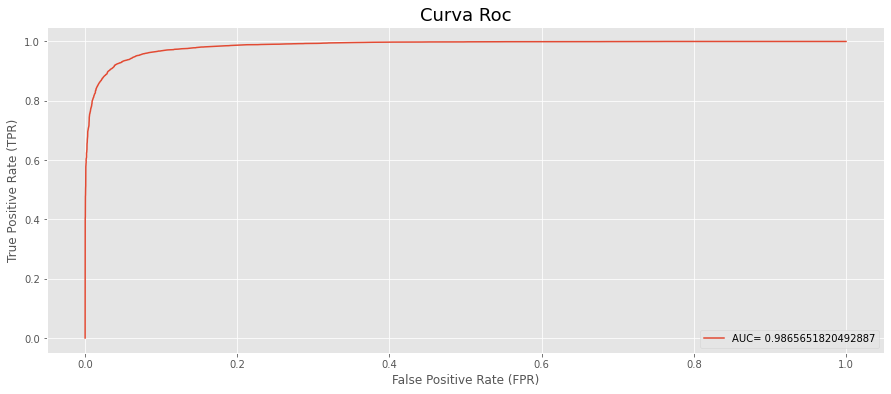

In [0]:
plt.figure(figsize=(15, 6))
plt.plot(pyspark_logistic_regression_method_roc["FPR"], pyspark_logistic_regression_method_roc["TPR"],
         label="AUC= "+str(pyspark_logistic_regression_method_auroc))
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.title("Curva Roc", size=18);
plt.show();

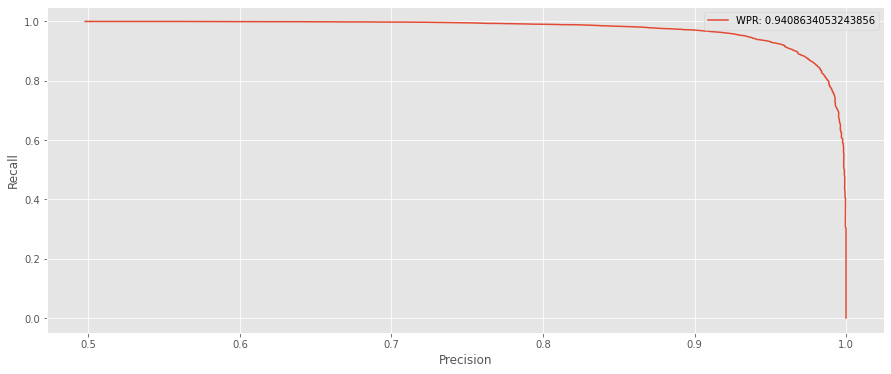

In [0]:
pyspark_logistic_regression_method_assessment = log_reg.summary
pyspark_logistic_regression_method_assessment_pr = pyspark_logistic_regression_method_assessment.pr.toPandas()
pyspark_logistic_regression_method_assessment_wpr = pyspark_logistic_regression_method_assessment.weightedPrecision

plt.figure(figsize=(15, 6))
plt.plot(pyspark_logistic_regression_method_assessment_pr["precision"],pyspark_logistic_regression_method_assessment_pr["recall"],
         label="WPR: "+str(pyspark_logistic_regression_method_assessment_wpr))
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

# MLFLow

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.classification import LogisticRegression

In [0]:
# Iniciar una nueva corrida de MLflow
with mlflow.start_run():
    # Crear y entrenar el modelo de regresión logística
    lr = LogisticRegression(featuresCol='features', labelCol='Status')
    lr_model = lr.fit(training_df)
    
    # Hacer predicciones
    predictions = lr_model.transform(test_df)
    predictions.show(5)

    # Registrar el modelo con MLflow
    mlflow.spark.log_model(lr_model, "Modelo_logitico")

    # Registrar métricas y parámetros
    mlflow.log_param("intercept", lr_model.interceptVector)
    mlflow.log_param("num_features", len(lr_model.coefficients))
    mlflow.log_metric("accuracy", lr_model.summary.accuracy)
    mlflow.log_metric("precision", lr_model.summary.weightedPrecision)
    mlflow.log_metric("recall", lr_model.summary.weightedRecall)

    print("Modelo registrado y parámetros guardados con MLflow")


+--------------------+------+--------------------+--------------------+----------+
|            features|Status|       rawPrediction|         probability|prediction|
+--------------------+------+--------------------+--------------------+----------+
|(8,[0,2,5,7],[1.0...|     0|[5.26849952609256...|[0.99487506602814...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[5.26849952609256...|[0.99487506602814...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[5.26849952609256...|[0.99487506602814...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[5.26849952609256...|[0.99487506602814...|       0.0|
|(8,[0,2,5,7],[1.0...|     0|[2.98418186956416...|[0.95185437894743...|       0.0|
+--------------------+------+--------------------+--------------------+----------+
only showing top 5 rows



2024/11/05 23:07:20 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2024/11/05 23:07:42 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/2321411912214784/b04bdc7105cc4cb08876f46a8538f047/artifacts/Modelo_logitico/sparkml, flavor: spark). Fall back to return ['pyspark==3.3.2', 'pandas<2']. Set logging level to DEBUG to see the full traceback. 
2024/11/05 23:07:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-bear-390 at: https://community.cloud.databricks.com/ml/experiments/2321411912214784/runs/b04bdc7105cc4cb08876f46a8538f047.
2024/11/05 23:07:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://community.cloud.databricks.com/ml/experiments/2321411912214784

Modelo registrado y parámetros guardados con MLflow
